# Classification Problem

In [2]:
import pandas as pd
import numpy as np

In [4]:
credit_df = pd.read_csv( "C:\Sid7\IMT Hyd\T4\MLAP\Class Material\MLAP - PYTHON Materials\MLAP - Text Book - DataSets\German Credit Data.csv" )
credit_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
credit_df.iloc[0:5,1:7] 

,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate
0,6,A34,1169,A65,A75,4
1,48,A32,5951,A61,A73,2
2,12,A34,2096,A61,A74,2
3,42,A32,7882,A61,A74,2
4,24,A33,4870,A61,A73,3


In [9]:
credit_df.head()  

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [12]:
#we're predicting the 'status' which is our target variable (dependant variable)- last one always

In [14]:
credit_df.status.value_counts() 

#status is target var and value count is how much of 0 and how much 1 (used only in catagorical)

0    700
1    300
Name: status, dtype: int64

In [16]:
credit_df.personal_status.value_counts()

A93    548
A92    310
A94     92
A91     50
Name: personal_status, dtype: int64

In [17]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features 

#we created a var named x_features and listing all the columns and removing the target var

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

## Encoding Catagorical Features

In [20]:
encoded_credit_df = pd.get_dummies( credit_df[X_features],drop_first = True ) 

#we create dummy var. (pd.get_dummies)

In [21]:
encoded_credit_df.head()

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [23]:
import statsmodels.api as sm
Y = credit_df.status
X = sm.add_constant( encoded_credit_df ) 

#y=dependant and x as independant with a constant

In [30]:
X.shape

#Constant is added Therere 30 and not 29

(1000, 30)

## Splitting into Train and Validation Sets

In [27]:
#we split to see the reulst of model in training data set
#in train we teach the model
#in test data target var is not given and independant var are present (we're predicting the model correct or not)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42) 

#0.3 in test so we're testing in 300 values 

In [33]:
X_train.shape

(700, 30)

In [35]:
X_test.shape

(300, 30)

In [36]:
y_train.shape

(700,)

##  Building Logistic Regression Model


In [39]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit() 

#logit is logistic regression

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


##  Printing Model Summary

In [40]:
logit_model.summary2() 

#Pseudo R-squared:	0.198 near to 1 then that much better is model
#P>\Z\ should be <0.05 else reject all the rest

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2020-09-19 21:44  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

##  Model Dignostics

In [42]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] ) 

#KEEP IT SAME ALWAYS

In [45]:
significant_vars = get_significant_vars( logit_model )
significant_vars 

#getting significant var (showing only values less than 0.05)

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

In [47]:
final_logit = sm.Logit( y_train,sm.add_constant( X_train[significant_vars] ) ).fit() 

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


In [48]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2020-09-19 21:51 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

##  Predicting on Test Data

In [53]:
y_pred_df = pd.DataFrame( { "actual": y_test,"predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) } ) 

#actual test var is y_test which is here 

In [58]:
y_pred_df.head(10)

,actual,predicted_prob,predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
678,0,0.388392,0
626,0,0.154052,0
513,0,0.521960,1
859,0,0.099708,0
136,0,0.249919,0


In [60]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.head(10)

,actual,predicted_prob,predicted
521,1,0.452449,0
737,0,0.491820,0
740,0,0.418416,0
660,0,0.270285,0
411,0,0.132119,0
678,0,0.388392,0
626,0,0.154052,0
513,0,0.521960,1
859,0,0.099708,0
136,0,0.249919,0


## Creating a Confusion Matrix

In [61]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics 

In [62]:
def draw_cm( actual, predicted ):
     ## Cret
     cm = metrics.confusion_matrix( actual, predicted, [1,0] )
     sn.heatmap(cm, annot=True, fmt='.2f',
        xticklabels = ["Bad credit", "Good Credit"] ,
        yticklabels = ["Bad credit", "Good Credit"] )
     plt.ylabel('True label')
     plt.xlabel('Predicted label')
     plt.show()
    
#change bad credit nd all as per dataset

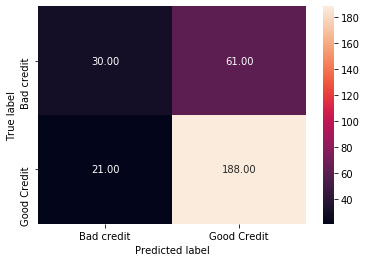

In [64]:
draw_cm( y_pred_df.actual,y_pred_df.predicted ) 

In [66]:
#true label= actual and pred label= predicted value
#30 (true negative coz bad prev and bad now) and 188 (true positive) are correct
#61 (false positive) and 21 (false negative)

#predict=good and actual bad= False positive
#predict=bad and actual good= False Negative

##  Measuring Accuracies

In [68]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



In [69]:
#recall is sensitivity

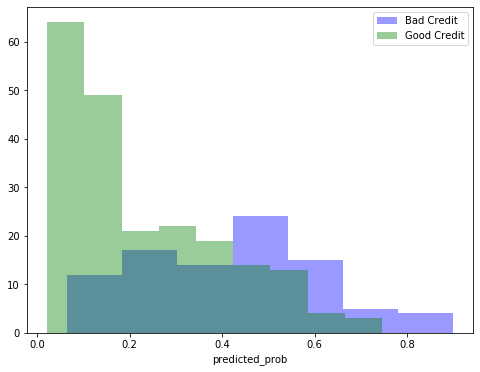

In [71]:
plt.figure( figsize = (8,6) )
sn.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"],
kde=False, color = 'b',
label = 'Bad Credit' )
sn.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"],
kde=False, color = 'g',
label = 'Good Credit' )
plt.legend()
plt.show() 

#same code always (not mendatory)

##  ROC & AUC

In [74]:
#used in model accuracy
# if ROC> 0.5 then that's better

In [73]:
def draw_roc( actual, probs ):
     fpr, \
     tpr, \
     thresholds = metrics.roc_curve( actual,
    probs,
    drop_intermediate = False )
     auc_score = metrics.roc_auc_score( actual, probs )
     plt.figure(figsize=(8, 6))
     plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
     plt.plot([0, 1], [0, 1], 'k--')
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
     plt.ylabel('True Positive Rate')
     plt.legend(loc="lower right")
     plt.show()
     return fpr, tpr, thresholds

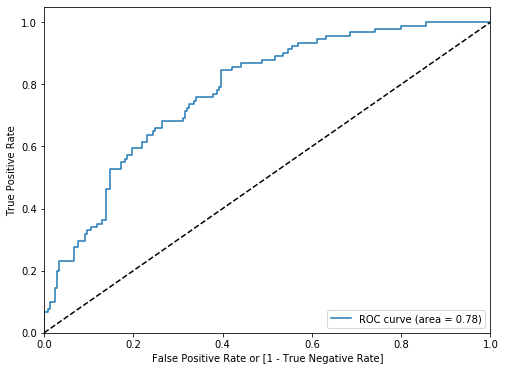

In [75]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob) 

In [76]:
#Here ROC= 0.78 = good
#true +ve rate aka sensitivity
#true -ve aka specificty

In [77]:
auc_score = metrics.roc_auc_score( y_pred_df.actual,
y_pred_df.predicted_prob )
round( float( auc_score ), 2 ) 

#To see the score

0.78

##  Finding Optimal Cutof

#### Youden's index

In [79]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


In [81]:
#tpr= true +ve rate= sensitivity given for each row and so on for both
#tpr-fpr= diff
#threshold= cutof point

In [83]:
y_pred_df['predicted_new'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.22 else 0)

#here we took threshold value as 0.22 

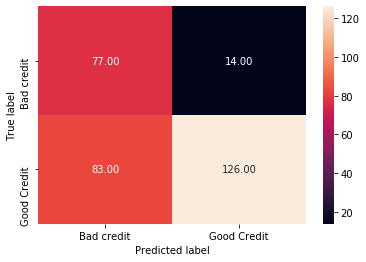

In [85]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_new) 

In [86]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_new )) 

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



In [87]:
#model is improved from before

####  Cost Based Approach

In [88]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
 cm = metrics.confusion_matrix( actual, predicted, [1,0] )
 cm_mat = np.array( cm )
 return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs 

#last line just above is an equation (cm is our confusion matrix)
#Copy Same As It Is 

In [89]:
cost_df = pd.DataFrame( columns = ['prob', 'cost']) 


In [90]:
idx = 0
## iterate cut-off probability values between 0.1 and 0.5
for each_prob in range( 10, 50):
 cost = get_total_cost( y_pred_df.actual,
y_pred_df.predicted_prob.map(
lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
 cost_df.loc[idx] = [(each_prob/100), cost]
 idx += 1 

In [91]:
cost_df.sort_values( 'cost', ascending = True )[0:5] 

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


In [93]:
y_pred_df['predicted_using_cost'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.14 else 0) 

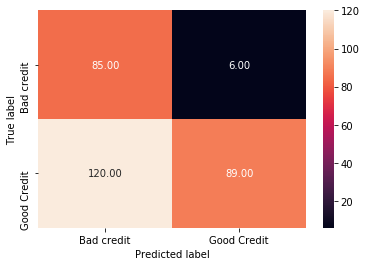

In [95]:
draw_cm( y_pred_df.actual,y_pred_df.predicted_using_cost ) 

In [96]:
print(metrics.classification_report( y_pred_df.actual,y_pred_df.predicted_using_cost )) 

              precision    recall  f1-score   support

           0       0.94      0.43      0.59       209
           1       0.41      0.93      0.57        91

    accuracy                           0.58       300
   macro avg       0.68      0.68      0.58       300
weighted avg       0.78      0.58      0.58       300



# KNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
bank_df = pd.read_csv( r"C:\Sid7\IMT Hyd\T4\MLAP\End Term\Classification Model - KNN\bank.csv")
bank_df.head(5)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


## Dealing with the imbalanced datasets

In [4]:
bank_df.subscribed.value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [5]:
## Importing resample from *sklearn.utils* package.
from sklearn.utils import resample
# Separate the case of yes-subscribes and no-subscribes
bank_subscribed_no = bank_df[bank_df.subscribed == 'no']
bank_subscribed_yes = bank_df[bank_df.subscribed == 'yes']
##Upsample the yes-subscribed cases.
df_minority_upsampled = resample(bank_subscribed_yes,replace=True, n_samples=2000) # sample with replacement
# Combine majority class with upsampled minority class
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled])

In [6]:
from sklearn.utils import shuffle
new_bank_df = shuffle(new_bank_df)

In [7]:
new_bank_df.subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [8]:
# Assigning list of all column names in the DataFrame
X_features = list( new_bank_df.columns )
# Remove the response variable from the list
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [9]:
## get_dummies() will convert all the columns with data type as objects
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True )
X = encoded_bank_df

In [10]:
# Encoding the subscribed column and assigning to Y
Y = new_bank_df.subscribed.map( lambda x: int( x == 'yes') )

In [11]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,
Y,
test_size = 0.3,
random_state = 42 )
# Setting random_state a fixed value will guarantee
# that the same sequence of random numbers is generated each time you run the code.

In [12]:
import sklearn as sl

In [13]:
## Importing the KNN classifier algorithm
from sklearn.neighbors import KNeighborsClassifier

In [14]:
## Initializing the classifier
knn_clf = KNeighborsClassifier()

In [15]:
## Fitting the model with the training set
knn_clf.fit( train_X, train_y )
# https://scikitlearn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# p=2 denotes it is Euclidean Distance

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## KNN Accuracy

In [16]:
## Importing the metrics
from sklearn import metrics

In [17]:
## The method takes the three following parameters
## model: the classification model
## test_X: X features of the test set
## test_y: actual labels of the test set
## Returns
## - ROC Auc Score
## - FPR and TPRs for different threshold values
def draw_roc_curve( model, test_X, test_y ):
## Creating and initializing a results DataFrame with actual labels
    test_results_df = pd.DataFrame( { 'actual': test_y } )
    test_results_df = test_results_df.reset_index()
# predict the probabilities on the test set
    predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
## selecting the probabilities that the test example belongs to class 1
    test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2]
## Invoke roc_curve() to return the fpr, tpr and threshold values.
## threshold values contain values from 0.0 to 1.0
    fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual,
    test_results_df.chd_1,
    drop_intermediate = False )
## Getting the roc auc score by invoking metrics.roc_auc_score method
    auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
## Setting the size of the plot
    plt.figure(figsize=(8, 6))
## plotting the actual fpr and tpr values
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    ## plotting th diagnoal line from (0,1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
## Setting labels and titles
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return auc_score, fpr, tpr, thresholds

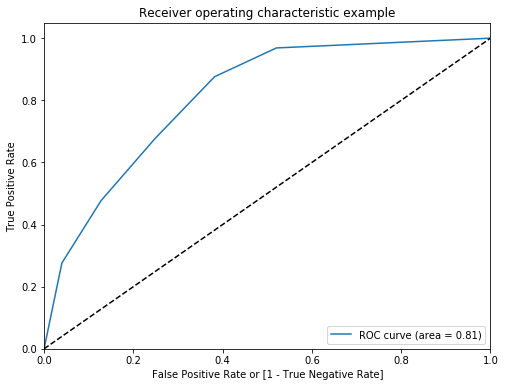

In [18]:
## Invoking draw_roc_curve with the KNN model
_, _, _, _ = draw_roc_curve( knn_clf, test_X, test_y )

In [19]:
## Importing the metrics
from sklearn import metrics
## Defining the matrix to draw the confusion metrix from actual and predicted class labels
def draw_cm( actual, predicted ):
# Invoking confusion_matrix from metric package. The matrix will oriented as[1,0] i.e.
# the classes with label 1 will be reprensted the first row and 0 as secondrow
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
## Confustion will be plotted as heatmap for better visualization
## The lables are configured to better interpretation from the plot
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Subscribed", "Not Subscribed"] ,
    yticklabels = ["Subscribed", "Not Subscribed"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

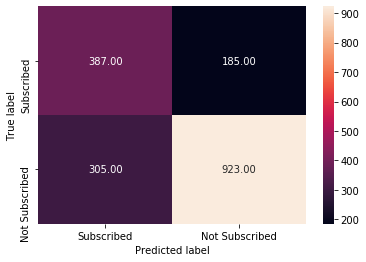

In [20]:
## Predicting on test set
pred_y = knn_clf.predict(test_X)
## Drawing the confusion matrix for KNN model
draw_cm( test_y, pred_y )

In [21]:
print( metrics.classification_report( test_y, pred_y ) )

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1228
           1       0.56      0.68      0.61       572

    accuracy                           0.73      1800
   macro avg       0.70      0.71      0.70      1800
weighted avg       0.75      0.73      0.73      1800

